<a href="https://colab.research.google.com/github/Intanpratiwiiii/Intann/blob/main/Frequency_Domain_Filter_Gaussian_Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
# libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

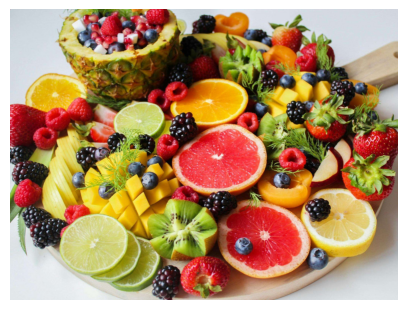

In [30]:
# open the image f
f = cv2.imread('Fruit.jpg')
#Convert BGR to RGB
f = cv2.cvtColor(f, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(5,5))
plt.imshow(f)
plt.axis('off')
plt.show()

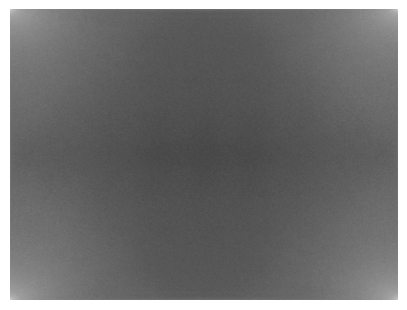

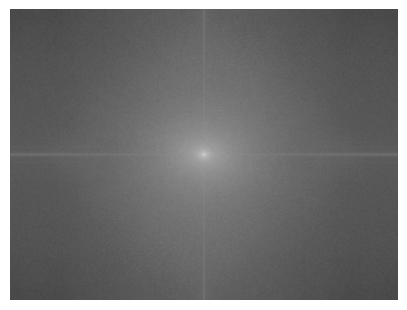

In [28]:
# transform the image into frequency domain, f --> F
F = np.fft.fft2(f)
Fshift = np.fft.fftshift(F)

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(F)), cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(Fshift)), cmap='gray')
plt.axis('off')
plt.show()


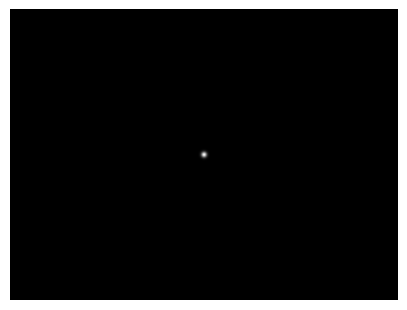

In [5]:
# Create Gaussin Filter: Low Pass Filter
M,N = f.shape
H = np.zeros((M,N), dtype=np.float32)
D0 = 10
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        H[u,v] = np.exp(-D**2/(2*D0*D0))

plt.figure(figsize=(5,5))
plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

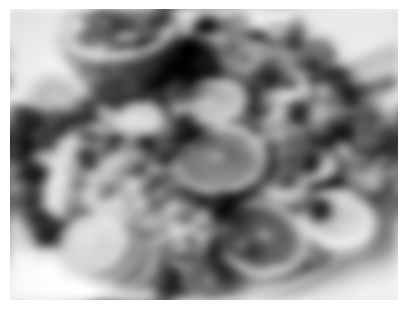

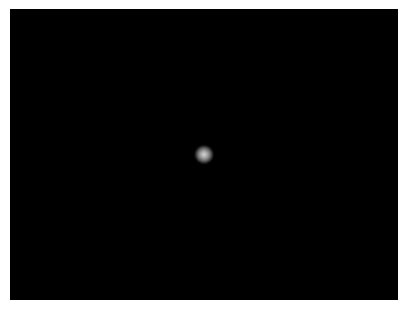

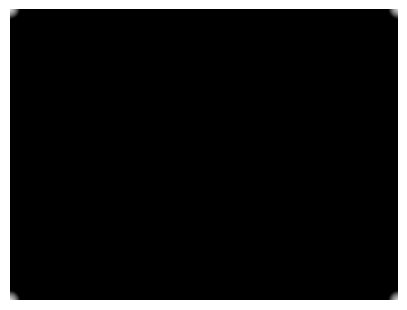

In [6]:
# Image Filters
Gshift = Fshift * H
G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))

plt.figure(figsize=(5,5))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(Gshift)), cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(G)), cmap='gray')
plt.axis('off')
plt.show()

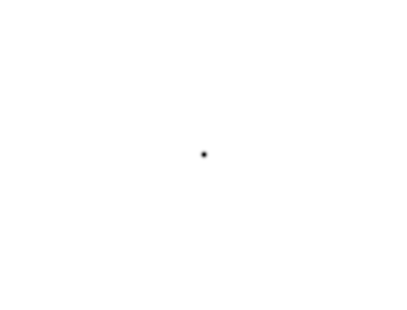

In [7]:
# Gaussian: High pass filter
HPF = 1 - H

plt.figure(figsize=(5,5))
plt.imshow(HPF, cmap='gray')
plt.axis('off')
plt.show()


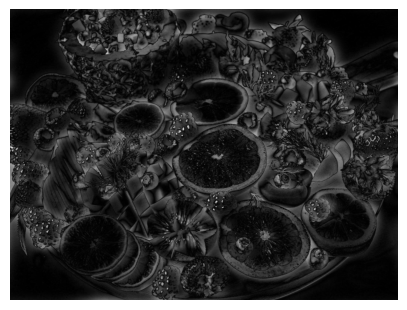

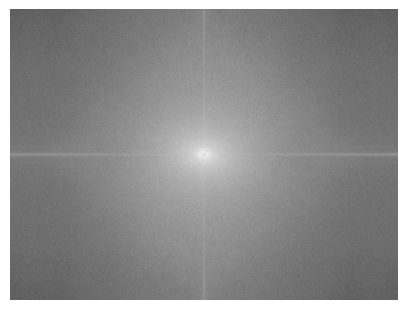

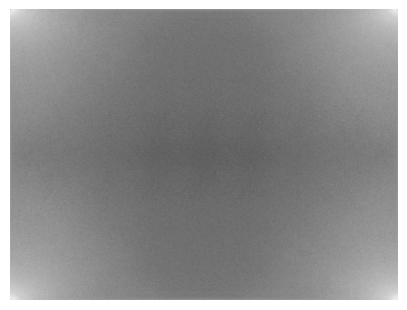

In [8]:
# Image Filters
Gshift = Fshift * HPF
G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))

plt.figure(figsize=(5,5))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(Gshift)), cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(G)), cmap='gray')
plt.axis('off')
plt.show()

